In [1]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import rcParams
from operator import itemgetter
from typing import Callable, Dict, List, Set, Tuple
from scipy.optimize import curve_fit
import csv

In [2]:
from util import calculate_derivative,pointInterval_to_pressure
from baseline import detect_breakpoints_startPoint, detect_breakpoints, detect_breakpoints_2, detect_breakpoints_3,detect_breakpoints_4,detect_breakpoints_startPoint2
from plot import PlotNSave
from data_load_N_preprocess import LoadNPreprocessData

In [3]:
#!pip install astropy

In [4]:
file_path=pressure_filePath="../data_input/pattern_left.txt"
pattern_left = pd.read_csv(file_path, delimiter=" ",skiprows=1, names=["X", "Y"],skipinitialspace = True)
pattern_left["X"]= pattern_left["X"]-pattern_left["X"][0]
pattern_left["Y"]= pattern_left["Y"]-pattern_left["Y"][0]
print(pattern_left.describe())


pattern_left_top=pattern_left.loc[pattern_left["Y"]>0]
pattern_left_bottom=pattern_left.loc[pattern_left["Y"]<0]

                X           Y
count  106.000000  106.000000
mean    -6.447343    1.100501
std      3.845383    2.987507
min    -14.049790   -2.763160
25%     -9.565758   -2.051525
50%     -6.371515    1.160395
75%     -3.177262    4.181658
max      0.000000    5.118920


In [5]:
file_path=pressure_filePath="../data_input/pattern_right_top.txt"
pattern_right_top = pd.read_csv(file_path, delimiter=" ",skiprows=1, names=["X", "Y"],skipinitialspace = True)
pattern_right_top["X"]= pattern_right_top["X"]-pattern_right_top["X"][0]
pattern_right_top["Y"]= pattern_right_top["Y"]-pattern_right_top["Y"][0]
pattern_right_top= pattern_right_top.clip(lower=0)
print(pattern_right_top.describe())
# pd.set_option('display.max_rows', pattern_right_top.shape[0]+1)
# pattern_right_top 


               X          Y
count  69.000000  69.000000
mean    1.339242   8.207413
std     1.180701   5.028328
min     0.000000   0.000000
25%     0.371150   3.726520
50%     0.962310   8.391060
75%     2.050570  12.649460
max     4.186780  16.254090


In [6]:
file_path=pressure_filePath="../data_input/pattern_right_bottom.txt"
pattern_right_bottom = pd.read_csv(file_path, delimiter=" ",skiprows=1, names=["X", "Y"],skipinitialspace = True)
pattern_right_bottom["X"]= pattern_right_bottom["X"]-pattern_right_bottom["X"][0]
pattern_right_bottom["Y"]= pattern_right_bottom["Y"]-pattern_right_bottom["Y"][0]

pattern_right_bottom= pattern_right_bottom.clip(lower=0)

print(pattern_right_bottom.describe())


               X          Y
count  77.000000  77.000000
mean    5.628174   6.761963
std     3.985883   3.379727
min     0.000000   0.000000
25%     1.995140   4.067440
50%     5.219620   7.767010
75%     9.048680   9.699000
max    12.877740  10.923490


In [7]:
def test_func_1(x, a,b,c,d):
    y = a+b*x-c*np.exp(d*x)
    return y
def test_func_2(x, a,b,c,d):
    y = a+b*x-c*np.exp(-d*x)
    return y

In [8]:
def fit_curve(xdata,ydata,test_func):
    x = np.asarray(xdata)
    y = np.asarray(ydata)
    parameters, covariance = curve_fit(test_func, x, y)
#     parameters, covariance = curve_fit(test_func, xdata, ydata)

    fit_a = parameters[0]
    fit_b = parameters[1]
    fit_c = parameters[2]
    fit_d = parameters[3]

    print(F'The parameters is {parameters}.')


    y_fit = test_func(x, fit_a, fit_b,fit_c,fit_d)

    plt.plot(x, y, 'o', label='data')
    plt.plot(x, y_fit, '-', label='LJ fit')
    return fit_a,fit_b,fit_c,fit_d

The parameters is [ 4.12959938 -0.07459858  4.31571225  0.27952833].
The parameters is [-3.00297354e+00 -3.35921627e-04 -2.99822437e+00  2.29392013e-01].
The parameters is [13.14227315  0.78460405 13.4545323   0.90468973].
The parameters is [8.77210719 0.17952762 8.95294473 0.28833003].


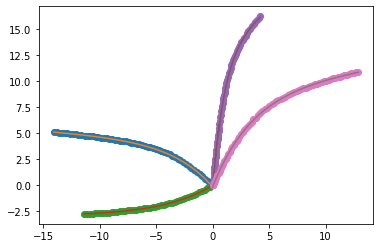

In [9]:
fit_parameters={}
curves=[pattern_left_top,pattern_left_bottom,pattern_right_top,pattern_right_bottom]
test_func=[test_func_1,test_func_1,test_func_2,test_func_2]
names=["pattern_left_top","pattern_left_bottom","pattern_right_top","pattern_right_bottom"]
for curve, func,name in zip(curves,test_func,names):
    xdata=curve["X"]
    ydata=curve["Y"]
    fit_parameters[name]=fit_curve(xdata,ydata,func)


# Synthetic_1

In [95]:
#experiment setup
ground_truth=[107, 164, 243, 328, 375, 446, 644, 713, 771, 820, 887, 953, 1036, 1101, 1179, 1254, 1319, 1396, 1456, 1513, 1598, 1648, 1719, 1784, 1875, 1938, 2017, 2073, 2185, 2247, 2315, 2369, 2433, 2487, 2552, 2610, 2835, 2916, 2965, 3044, 3101, 3240, 3284, 3368, 3411]
print(len(ground_truth))
# colum_names ={"pressure":{"Date","Pressure (psia)","first_order_derivative","second_order_derivative"},
#                     "rate":{"Time@end","Liquid rate (STB/D)"}}

colum_names={"pressure":{"time":"Date",
                        "measure":"Pressure (psia)",
                        "first_order_derivative":"first_order_derivative",
                        "second_order_derivative":"second_order_derivative"},
             "rate":{"time":"Time@end",
                     "measure":"Liquid rate (STB/D)"}}
data_inOneRow=400
pressure_filePath="../data_input/Synthetic_Data.xlsx"
rate_filePath="../data_input/Synthetic_Data.xlsx"

45


In [135]:
ground_truth_buildUp=[point for index, point in enumerate(ground_truth) if index%2!=0]
ground_truth_buildUp
len(ground_truth_buildUp)

22

In [96]:
processed_data=LoadNPreprocessData(pressure_filePath=pressure_filePath, 
                 rate_filePath=rate_filePath, 
                 colum_names=colum_names, 
                 use_SG_smoothing=False)
pressure_df=processed_data.pressure_df
rate_df=processed_data.rate_df

display(pressure_df)
display(rate_df)


---load data from 'txt' or 'xlsx' files...
---The first & second order derivative has been calculated and appended to pressure dataframe


,Date,Pressure (psia),first_order_derivative,second_order_derivative
0,0.000000,2000.000000,15175.401994,-1.593896e+06
1,0.006111,2092.738568,5434.926885,-2.211251e+05
2,0.012222,2125.952010,4083.606969,-1.648675e+05
3,0.018056,2149.773050,3121.879672,-7.945161e+04
4,0.024167,2168.851204,2636.342081,-5.537004e+04
...,...,...,...,...
3514,5938.051389,2327.338989,-0.150989,1.763948e-04
3515,5968.345556,2322.764893,-0.145646,1.653610e-04
3516,5998.640000,2318.352641,-0.140636,1.544522e-04
3517,6028.934444,2314.092149,-0.135957,0.000000e+00


,Time@end,Liquid rate (STB/D)
0,0.000000,-6742.395145
1,253.216667,-8513.514104
2,264.358333,0.000000
3,274.191667,-5548.484464
4,296.716667,-8951.244013
...,...,...
90,4465.793056,0.107707
91,4465.834722,0.105123
92,4465.909722,-1909.311284
93,5058.868056,-5453.279913


In [12]:
def pointInterval_to_curve_data(point_index:int,
                               pressure_df, 
                               delta_point:int=10,
                               colum_names:Dict={"pressure":{"time":"Date",
                                "measure":"Pressure (psia)",
                                "first_order_derivative":"first_order_derivative",
                                "second_order_derivative":"second_order_derivative"},
                                 "rate":{"time":"Time@end",
                                         "measure":"Liquid rate (STB/D)"}})->List[float]:
    """
    extract pressure measurements between point_index and point_index+delta_point
    Args:
    """
    if delta_point>0:
        sub_df=pressure_df.iloc[point_index:point_index+delta_point]
    else:
        sub_df=pressure_df.iloc[point_index+1+delta_point:point_index+1]
        #reverse dataframe
        sub_df=sub_df.iloc[::-1]
    time=sub_df[colum_names["pressure"]["time"]]-sub_df.iloc[0][colum_names["pressure"]["time"]]
    pressure_measure=sub_df[colum_names["pressure"]["measure"]]-sub_df.iloc[0][colum_names["pressure"]["measure"]]
    return {"time":list(np.round(time,6)),"pressure_measure":list(np.round(pressure_measure,6))}

pointInterval_to_curve_data(100,pressure_df)
pointInterval_to_curve_data(100,pressure_df,-10)

{'time': [0.0,
  -3.946667,
  -6.635556,
  -8.4675,
  -9.715556,
  -10.565833,
  -11.145278,
  -11.54,
  -11.808889,
  -11.991944],
 'pressure_measure': [0.0,
  -20.776825,
  -40.225757,
  -58.655368,
  -76.26545,
  -93.170596,
  -109.42044,
  -125.016514,
  -139.926528,
  -154.096933]}

In [13]:
curveDataLeft=pd.DataFrame(columns=['time', 'pressure_measure'])
for point in ground_truth:
    data=pointInterval_to_curve_data(point,pressure_df,-5,colum_names)
#     print(data)
    curveDataLeft=curveDataLeft.append(data,ignore_index=True)
    
curveDataLeft    

,time,pressure_measure
0,"[0.0, -2.928333, -5.856667, -32.745556, -51.06...","[0.0, -3.470247, -7.014217, -43.900906, -75.90..."
1,"[0.0, -0.130833, -0.261667, -1.444722, -2.499167]","[0.0, 2.357905, 4.745042, 27.800426, 50.934658]"
2,"[0.0, -2.174167, -4.348333, -10.141389, -14.08...","[0.0, -9.368156, -19.856413, -55.924786, -92.4..."
3,"[0.0, -0.002778, -0.005278, -0.012778, -0.019444]","[0.0, -0.278444, -0.564902, -1.442547, -2.296898]"
4,"[0.0, -6.5325, -13.064722, -25.545556, -34.048...","[0.0, -16.368913, -35.11735, -81.007108, -125...."
5,"[0.0, -2.443333, -4.886944, -10.816944, -16.10...","[0.0, 7.128509, 14.637056, 34.681167, 55.182097]"
6,"[0.0, -5.976667, -11.953056, -42.2475, -72.541...","[0.0, -3.126825, -6.305237, -23.287391, -41.97..."
7,"[0.0, -1.453056, -2.906389, -7.616667, -11.814...","[0.0, 7.297753, 14.854768, 41.359735, 68.062564]"
8,"[0.0, -11.356944, -22.714167, -41.033333, -53....","[0.0, -18.794173, -42.032012, -95.819834, -155..."
9,"[0.0, -0.059167, -0.118333, -0.589444, -1.009444]","[0.0, 3.113389, 6.26865, 32.974853, 59.631138]"


In [14]:
filepath= "../data_output/curveDataLeft_for_learnPattern.csv"   
curveDataLeft.to_csv(filepath,index=False,float_format='%.4f',sep='\t')

In [15]:
# point_index=100
# delta_point=-10
# sub_df=pressure_df.iloc[point_index+1+delta_point:point_index+1]
# display(sub_df)
# sub_df=sub_df.iloc[::-1]
# display(sub_df)
# sub_df.iloc[0]
# time=sub_df[colum_names["pressure"]["time"]]-sub_df.iloc[0][colum_names["pressure"]["time"]]

# pressure_measure=sub_df[colum_names["pressure"]["measure"]]-sub_df.iloc[0][colum_names["pressure"]["measure"]]
# time,pressure_measure

In [16]:
# point_index=100
# delta_point=10
# sub_df=pressure_df.iloc[point_index:point_index+delta_point]
# display(sub_df)
# sub_df.iloc[0]
# time=sub_df[colum_names["pressure"]["time"]]-sub_df.iloc[0][colum_names["pressure"]["time"]]
# time
# pressure_measure=sub_df[colum_names["pressure"]["measure"]]-sub_df.iloc[0][colum_names["pressure"]["measure"]]
# pressure_measure

[0.0, -2.928333, -5.856667, -32.745556, -51.064722] [0.0, -3.470247, -7.014217, -43.900906, -75.907231]


c:\users\junec\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


45

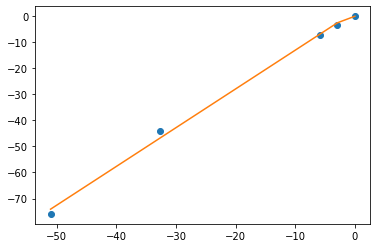

In [53]:
def fit_curve(xdata,ydata,test_func,parameter_number):
    x = np.asarray(xdata)
    y = np.asarray(ydata)
    parameters, covariance = curve_fit(test_func, x, y)
#     parameters, covariance = curve_fit(test_func, xdata, ydata)
#     print(F'The parameters is {parameters}.')
    if parameter_number==4:
        fit_a = parameters[0]
        fit_b = parameters[1]
        fit_c = parameters[2]
        fit_d = parameters[3]

        y_fit = test_func(x, fit_a, fit_b,fit_c,fit_d)

    if parameter_number==3:
        fit_a = parameters[0]
        fit_b = parameters[1]
        fit_c = parameters[2]

        y_fit = test_func(x, fit_a, fit_b,fit_c)
    
    plt.plot(x, y, 'o', label='data')
    plt.plot(x, y_fit, '-', label='LJ fit')
#     plt.show()
    return parameters

len(curveDataLeft)
xdata=curveDataLeft["time"][0]
ydata=curveDataLeft["pressure_measure"][0]
print(xdata,ydata)
test_func=test_func_1
fit_curve(xdata,ydata,test_func,4)

len(curveDataLeft)

-----------i--------- 0
The parameters is [ 1.85605685  1.48729861  1.85605685 47.05964005].
The parameters is [4.32439037e-01 1.35117686e+00 4.88274176e-22 1.00000160e+00].
-----------i--------- 1


c:\users\junec\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

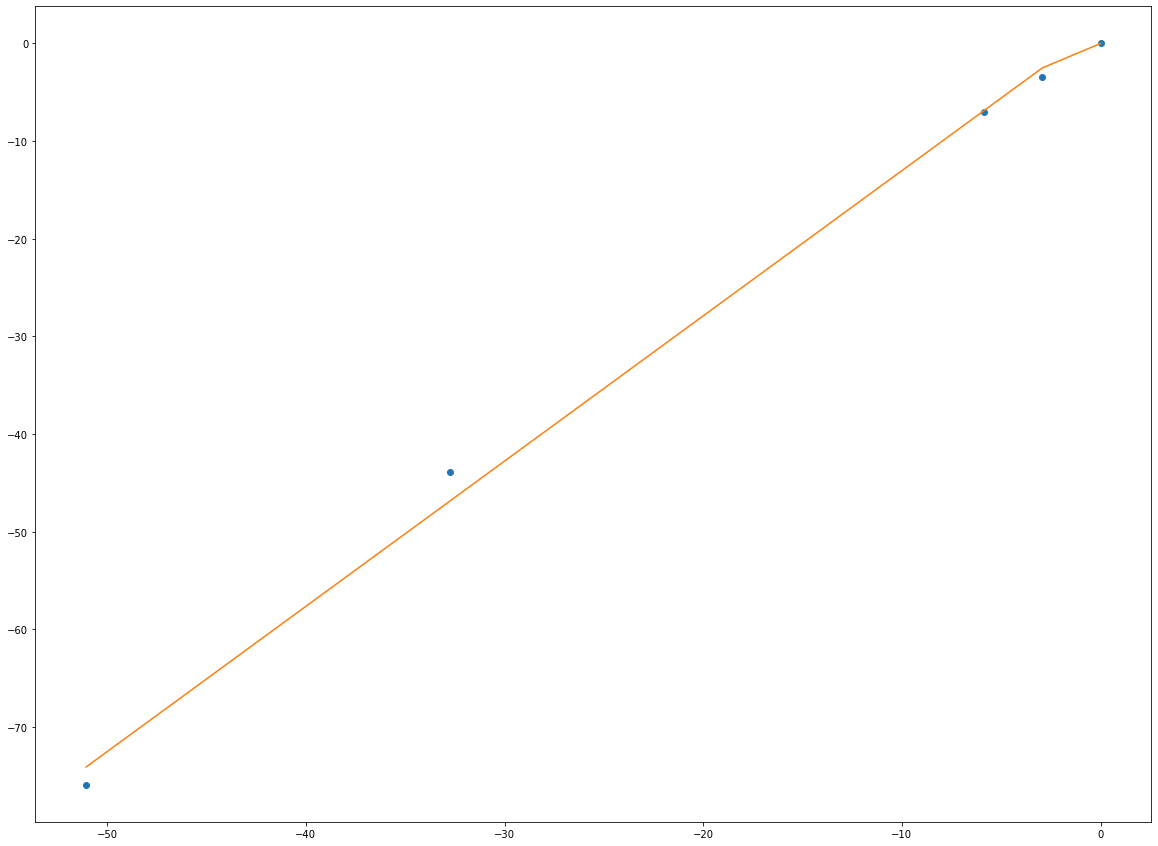

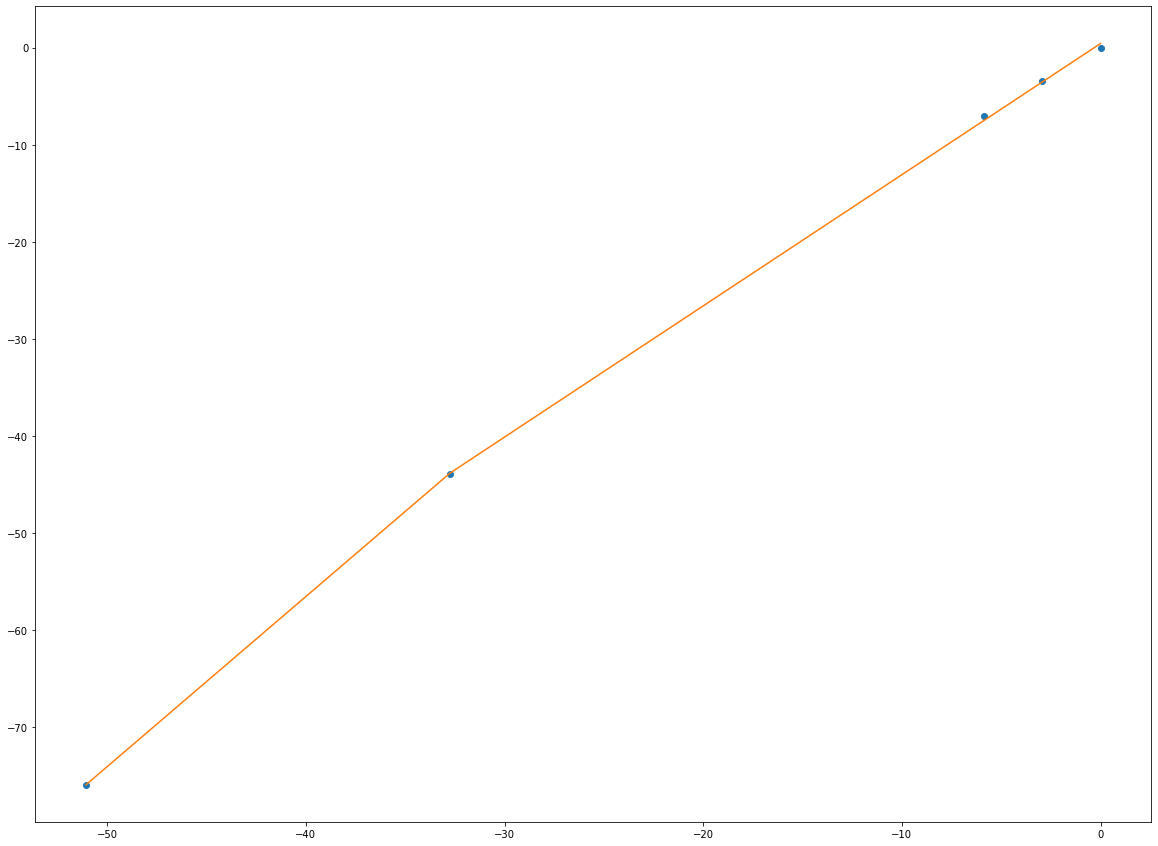

In [18]:
for i in range(len(curveDataLeft)):
    xdata=curveDataLeft["time"][i]
    ydata=curveDataLeft["pressure_measure"][i]
#     print(xdata,ydata)
    print("-----------i---------",i)
    try:
        test_func=test_func_1
        fit_curve(xdata,ydata,test_func,4)
    except RuntimeError:
        test_func=test_func_2
        fit_curve(xdata,ydata,test_func,4)
    try:
        test_func=test_func_2
        fit_curve(xdata,ydata,test_func,4)
    except RuntimeError:
        test_func=test_func_1
        fit_curve(xdata,ydata,test_func,4)

In [34]:
number=10
curve_points = np.empty((0, number), int)
print(curve_points)
type(parameters[0])
a,b,c=parameters[0]
x=np.linspace(start = 0, stop = 1, num = number)
temp=test_func_3(x, a,b,c)
print(temp,type(temp))
curve_points=np.append(curve_points,np.array([test_func_3(x, a,b,c)]), axis=0)
curve_points

[]
[-0.19588186 -0.07589932  0.04388926  0.16348387  0.28288452  0.40209121
  0.52110393  0.63992269  0.75854749  0.87697833] <class 'numpy.ndarray'>


array([[-0.19588186, -0.07589932,  0.04388926,  0.16348387,  0.28288452,
         0.40209121,  0.52110393,  0.63992269,  0.75854749,  0.87697833]])

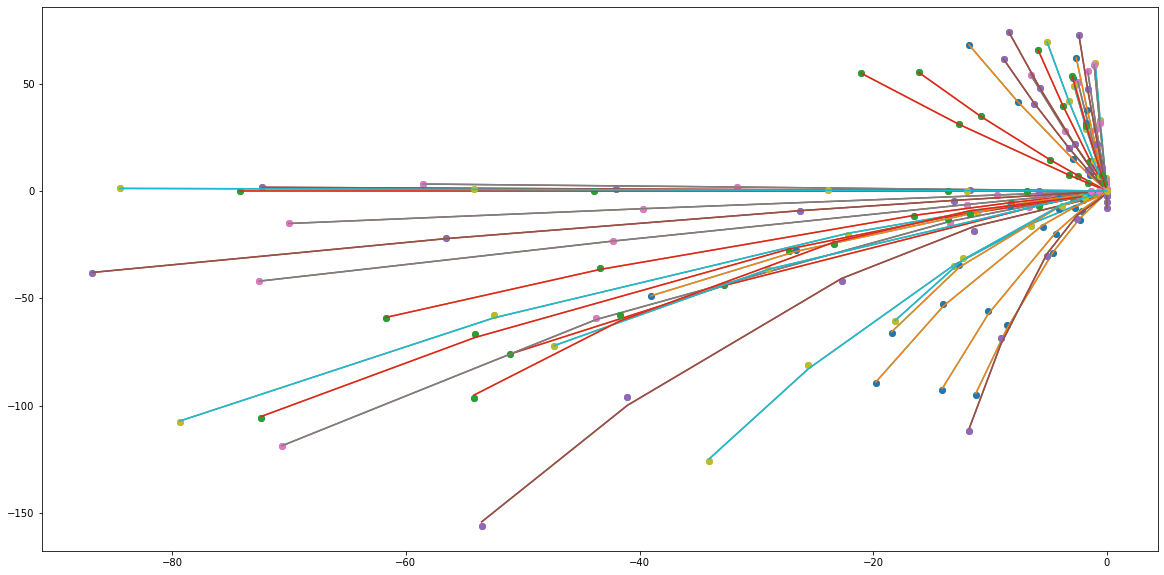

In [69]:
number=10
curve_points = np.empty((0, number), int)
x=np.linspace(start = -0.1, stop = 0, num = number)
parameters=[]
plt.figure(figsize = (20, 10))
def test_func_3(x, a,b,c):
    y = a+b*x+c*x*x
    return y
for i in range(len(curveDataLeft)):
    xdata=curveDataLeft["time"][i]
    ydata=curveDataLeft["pressure_measure"][i]
#     print(xdata,ydata)
#     print("-----------i---------",i)
    try:
        test_func=test_func_3
        parameters.append(fit_curve(xdata,ydata,test_func_3,3))
        a,b,c=fit_curve(xdata,ydata,test_func_3,3)
        y=test_func_3(x, a,b,c)
       
        curve_points=np.append(curve_points,np.array([y]), axis=0)
        
    except RuntimeError:
        print("----------errors",RuntimeError)
        pass

In [70]:
curve_points.shape
curve_max=curve_points.max(axis=0)
curve_max

array([5.25903966, 4.67078335, 4.08436097, 3.49977254, 2.91701804,
       2.33609749, 1.75701087, 1.17975819, 0.60433944, 0.06514206])

In [71]:
curve_points.shape
curve_min=curve_points.min(axis=0)
curve_min

array([-57.60859616, -48.87171021, -40.71940693, -33.15168631,
       -26.16854835, -19.76999306, -13.95602043,  -8.72663047,
        -4.08182317,  -1.64982249])

47

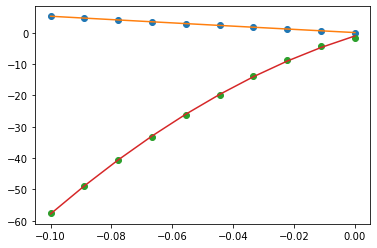

In [72]:
xdata=x
test_func=test_func_3
parameters.append(fit_curve(xdata,curve_max,test_func_3,3))
# a,b,c=fit_curve(xdata,ydata,test_func_3,3)

parameters.append(fit_curve(xdata,curve_min,test_func_3,3))
# a,b,c=fit_curve(xdata,ydata,test_func_3,3)
len(parameters)


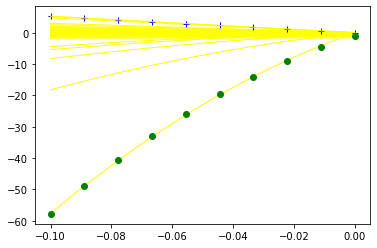

In [89]:
for i,p in enumerate(parameters):
    a,b,c=p
    y=test_func_3(x, a,b,c)
    if i==len(parameters)-2:
        plt.plot(x, y, 'r+', label='LJ fit',color="blue",linewidth=5)
    if i==len(parameters)-1:
        plt.plot(x, y, 'bo', label='LJ fit',color="green")
    else:
        plt.plot(x, y, '-', label='LJ fit',color="yellow",linewidth=1)
        

In [92]:
a=[1,2,3]
a[-1]

3

In [200]:
class LearnPattern:
    def __init__(self, 
                 pressure_measure:List[float],
                 pressure_time:List[float],
                 ground_truth:List[int],
                 delta_pointNumber:int=5,
                 deltaTime_learn:float=0.1,
                 fitting_func=quadratic_func,
                 filePath_learnedPattern="../data_output/Learned_Pattern.csv",
                filepath_curveDataLeft= "../data_output/curveDataLeft_forLearning.csv",
                filepath_curveDataRight= "../data_output/curveDataRight_forLearning.csv"):
        
        self.pressure_measure=pressure_measure
        self.pressure_time=pressure_time
        self.ground_truth=ground_truth
        self.colum_names=colum_names
        self.filePath_learnedPattern=filePath_learnedPattern
        self.delta_pointNumber=delta_pointNumber
        self.deltaTime_learn=deltaTime_learn
        self.fitting_func=fitting_func
        self.filepath_curveDataLeft=filepath_curveDataLeft
        self.filepath_curveDataRight=filepath_curveDataRight
        
        self.curveDataLeft=pd.DataFrame(columns=['time', 'pressure_measure'])
        self.curveDataRight=pd.DataFrame(columns=['time', 'pressure_measure'])
        self.curveLeft_parameters=[]
        self.curveRight_parameters=[]
        self.parameters_PatternField={}
        self.x_leftPlot=[]
        self.x_rightPlot=[]
        

    def point_to_curve_data(self, point_index:int,pointNumber)->List[float]:
        """
        extract pressure measurements between point_index and point_index+delta_point
        Args:
        delta_point
        """
        if pointNumber>0:
            sub_measure=self.pressure_measure[point_index:point_index+pointNumber]
            sub_time=self.pressure_time[point_index:point_index+pointNumber]
            curve_pressure=[round(measure-sub_measure[0],6) for measure in sub_measure]
            curve_time=[round(time-sub_time[0],6) for time in sub_time]
        else:
            sub_measure=self.pressure_measure[point_index+1+pointNumber:point_index+1]
            sub_time=self.pressure_time[point_index+1+pointNumber:point_index+1]
            curve_pressure=[round(measure-sub_measure[-1],6) for measure in sub_measure]
            curve_time=[round(time-sub_time[-1],6) for time in sub_time]

        return {"time":curve_time,"pressure_measure":curve_pressure}

    def produceNSave_curveData(self):     
        for point in self.ground_truth:
            data_left=self.point_to_curve_data(point,-self.delta_pointNumber)
            self.curveDataLeft=self.curveDataLeft.append(data_left,ignore_index=True)
            data_right=self.point_to_curve_data(point,self.delta_pointNumber)
            self.curveDataRight=self.curveDataRight.append(data_right,ignore_index=True)
        self.curveDataLeft.to_csv(self.filepath_curveDataLeft,index=False,float_format='%.4f',sep='\t')
        self.curveDataRight.to_csv(self.filepath_curveDataRight,index=False,float_format='%.4f',sep='\t')   
        
#     def fit_curve(self,xdata,ydata):
#         x = np.asarray(xdata)
#         y = np.asarray(ydata)
        
#         parameters, covariance = curve_fit(self.fitting_func, x, y)
#         y_fit = self.fitting_func(x, *parameters)

#         plt.plot(x, y, 'o', label='data')
#         plt.plot(x, y_fit, '-', label='LJ fit')
#         plt.show()
#         return parameters

    def fit_curve(self,xdata,ydata):
        x = np.asarray(xdata)
        y = np.asarray(ydata)
        
#         parameters, covariance = curve_fit(self.fitting_func, x, y)
#         y_fit = self.fitting_func(x, *parameters)
        parameters=np.polyfit(x,y,3)
        y_fit=np.polyval(parameters,x)
        print(parameters)

        plt.plot(x, y, 'o', label='data')
        plt.plot(x, y_fit, '-', label='LJ fit')
        plt.show()
        return parameters
    
    def calculate_Parameters_allCurve(self):
        plt.figure(figsize = (20, 10))
        
        if len(self.curveDataLeft)==len(self.curveDataRight):
            curve_number=len(self.curveDataLeft)
        else:
            print("error:length of curveDataLeft is not equal to length of curveDataRight")
            return None

        for i in range(curve_number):
            #left side
                        
#             print("-----------i---------",i)
            xdata=self.curveDataLeft["time"][i]
            ydata=self.curveDataLeft["pressure_measure"][i]
#             print(xdata,ydata)
            if i==0:
                xLeft_min=abs(xdata[0])
                self.x_leftPlot=xdata
            if i>0 and abs(xdata[0])<xLeft_min:
                xLeft_min=abs(xdata[0])
                self.x_leftPlot=xdata
                
            try:
                self.curveLeft_parameters.append(self.fit_curve(xdata,ydata))
            except KeyError:
                print("error:",RuntimeError)
                pass
            
            #right side
            xdata=self.curveDataRight["time"][i]
            ydata=self.curveDataRight["pressure_measure"][i]
            if i==0:
                xRight_min=abs(xdata[-1])
                self.x_rightPlot=xdata
            if i>0 and abs(xdata[-1])<xRight_min:
                xRight_min=abs(xdata[-1])
                self.x_rightPlot=xdata
            try:
                self.curveRight_parameters.append(self.fit_curve(xdata,ydata))
            except KeyError:
                print("error:",RuntimeError)
                pass
            
    def calculate_PatternField(self):
#         y_left_allCurve = np.empty((0, len(self.x_leftPlot)), float)
#         y_right_allCurve = np.empty((0, len(self.x_rightPlot)), float)
  
#         #left
#         x_left=np.asarray(self.x_leftPlot)
#         x_right=np.asarray(self.x_rightPlot)
        y_left_allCurve = np.empty((0, 3), float)
        y_right_allCurve = np.empty((0, 3), float)
        x_left=np.linspace(start = -0.1, stop = 0, num = 3)
        x_right=np.linspace(start = 0, stop = 0.1, num = 3)
    
        plt.figure(figsize = (20, 10))
        curve_number=len(self.curveRight_parameters)
        for i in range(curve_number):
            y_left=self.fitting_func(x_left, self.curveLeft_parameters[i])
            plt.plot(x_left, y_left, '-', label='LJ fit',color="yellow",linewidth=1)
            y_left_allCurve=np.append(y_left_allCurve,np.array([y_left]), axis=0)
            
            y_right=self.fitting_func(x_right, self.curveRight_parameters[i])
            plt.plot(x_right, y_right, '-', label='LJ fit',color="yellow",linewidth=1)
            y_right_allCurve=np.append(y_right_allCurve,np.array([y_right]), axis=0)
            
        left_parameters_PatternField=self.fitNPlot_maxNMin(x_left,y_left_allCurve)
        right_parameters_PatternField=self.fitNPlot_maxNMin(x_right,y_right_allCurve)
        self.parameters_PatternField["left top"]=left_parameters_PatternField["top"]
        self.parameters_PatternField["left bottom"]=left_parameters_PatternField["bottom"]
        self.parameters_PatternField["right top"]=right_parameters_PatternField["top"]
        self.parameters_PatternField["right bottom"]=right_parameters_PatternField["bottom"]


    def fitNPlot_maxNMin(self,x,y_allCurve):
        half_parameters_PatternField={}
        
        y_allCurve_max=y_allCurve.max(axis=0)
        half_parameters_PatternField["top"]=self.fit_curve(x,y_allCurve_max)
     
        y_allCurve_min=y_allCurve.min(axis=0)
        half_parameters_PatternField["bottom"]=self.fit_curve(x,y_allCurve_min)
        
        return half_parameters_PatternField
    
    def learn(self):
        self.produceNSave_curveData()
        self.calculate_Parameters_allCurve()
        self.calculate_PatternField()
    def sav_pattern(self,filepath_save):
        pattern_df=pd.DataFrame(self.parameters_PatternField)
        pattern_df.to_csv(filepath_save,index=False,float_format='%.4f',sep='\t',mode="a")
       

[-6.38894588e-02  8.28261454e-01 -1.79127922e+01  2.66453526e-15]


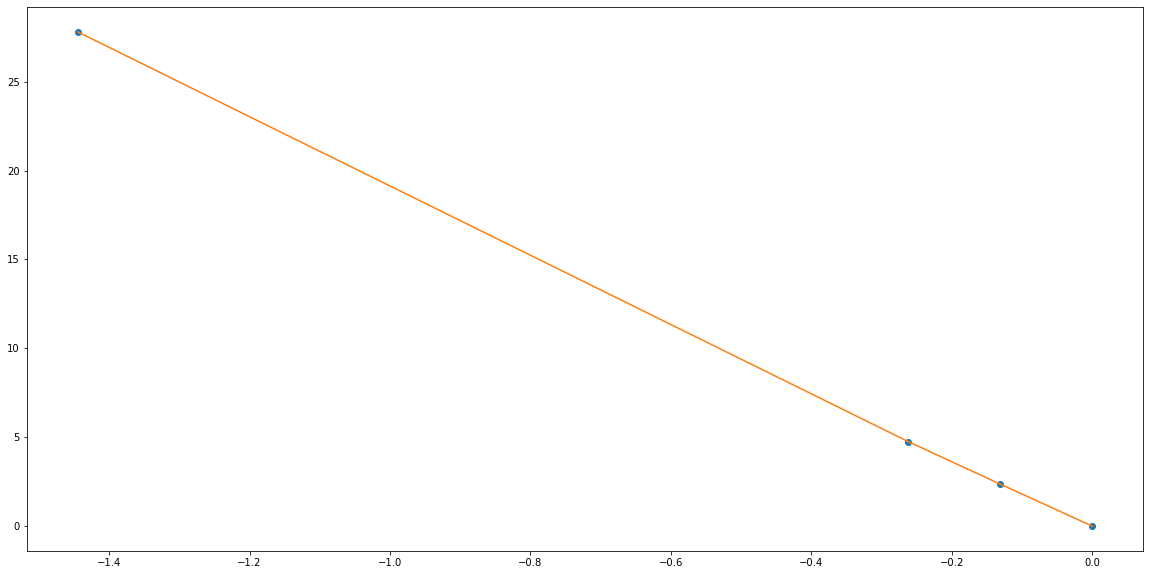

[ 3.11611876e+07 -1.22712935e+06  1.88059720e+04  7.10542736e-14]


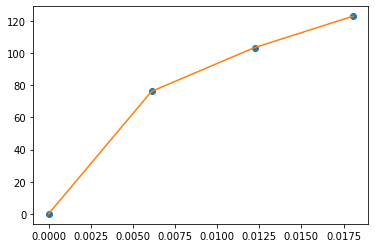

[-1.93729906e+05 -4.27978221e+03  8.98376552e+01 -8.32667268e-17]


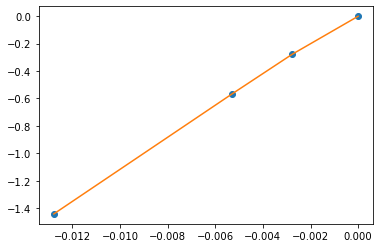

[ 3.06230084e+07 -1.23607559e+06  1.95701130e+04 -1.13686838e-13]


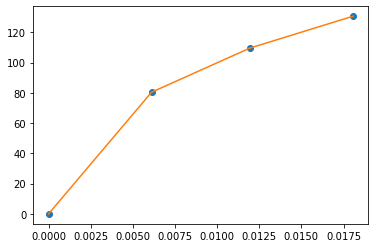

[-4.57943773e-04  2.83994332e-02 -2.84541164e+00  0.00000000e+00]


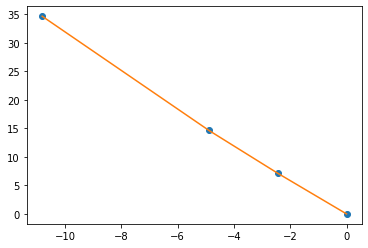

[ 2.56105813e+07 -1.00849230e+06  1.54665595e+04  5.68434189e-14]


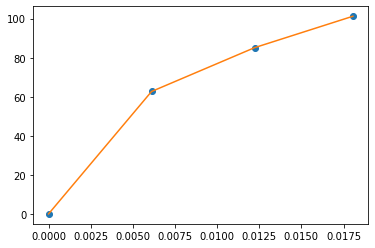

[-1.08594240e-03  5.63155620e-02 -4.93822558e+00 -2.66453526e-15]


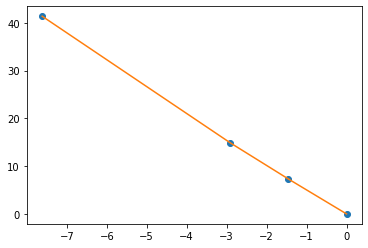

[ 2.36619631e+07 -9.31770312e+05  1.42877426e+04  6.39488462e-14]


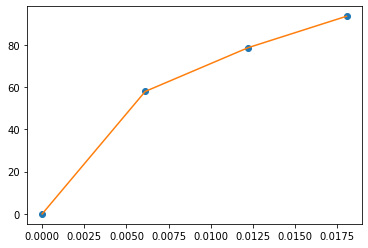

[-5.86707043e-01  5.88398722e+00 -5.22701709e+01  8.88178420e-16]


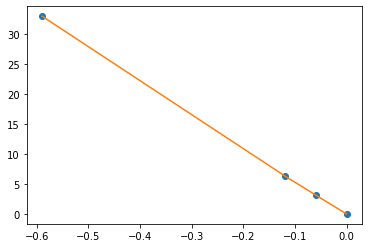

[ 2.02424703e+07 -8.11731588e+05  1.25431687e+04  1.42108547e-14]


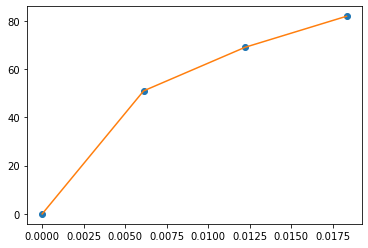

[-2.75075418e-03  1.25040405e-01 -7.32305684e+00 -4.44089210e-16]


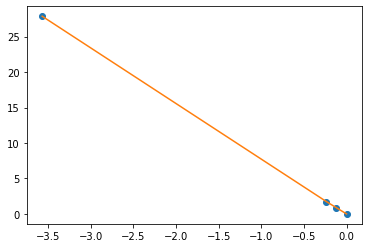

[ 3.63549889e+07 -1.45786041e+06  2.26128837e+04  7.10542736e-14]


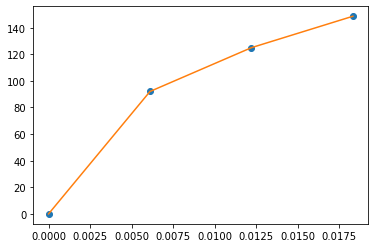

[-3.21921286e-03  9.93431716e-02 -5.79722920e+00  3.10862447e-15]


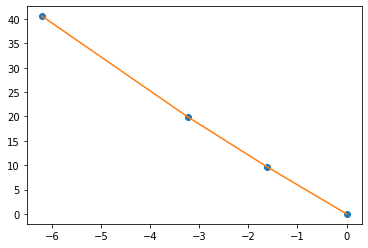

[ 2.20134589e+07 -8.82755025e+05  1.36910703e+04  3.55271368e-14]


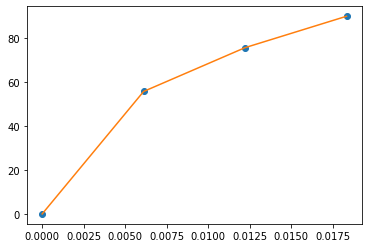

[-1.28714028e-04  1.41111293e-02 -2.24780103e+00 -3.10862447e-15]


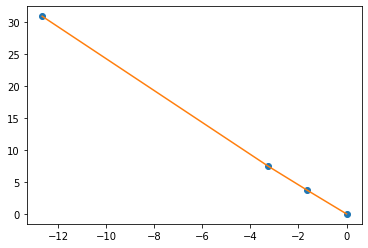

[ 1.83776293e+07 -7.36955815e+05  1.14323673e+04 -7.10542736e-15]


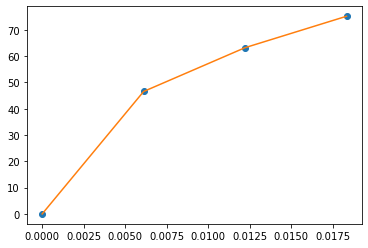

[-5.11716873e-02  5.91309732e-01 -1.60628595e+01 -8.88178420e-16]


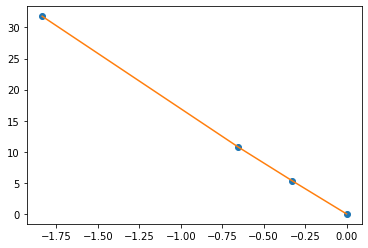

[ 2.16920285e+07 -8.69864939e+05  1.34809164e+04  3.55271368e-14]


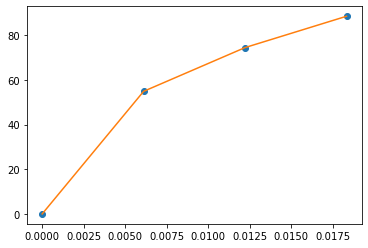

[-6.44224066e-02  6.39348075e-01 -1.51106070e+01 -4.44089210e-15]


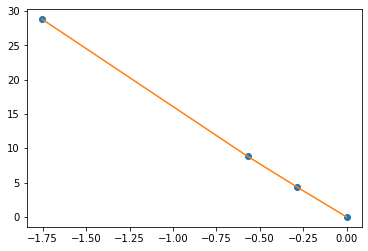

[ 3.50989795e+07 -1.40749299e+06  2.18236908e+04  8.52651283e-14]


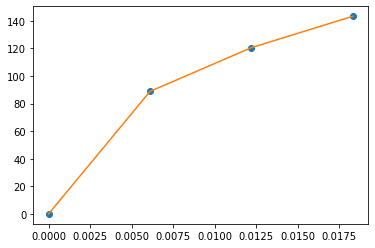

[-6.90252923e-01  4.70507612e+00 -4.73433794e+01 -2.22044605e-15]


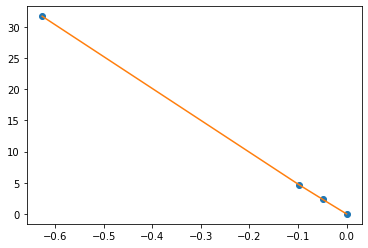

[ 2.48413174e+07 -9.96149615e+05  1.54093856e+04  4.26325641e-14]


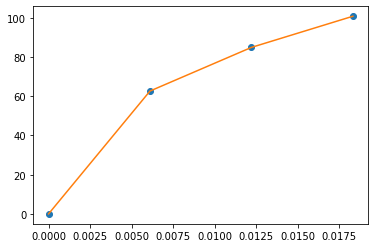

[-3.75095179e-03  1.27988405e-01 -7.46517118e+00 -2.66453526e-15]


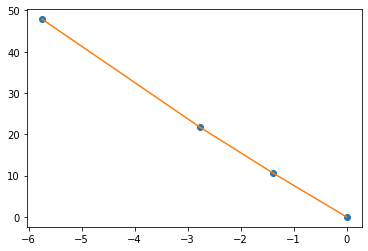

[ 3.36465987e+07 -1.34925206e+06  2.09275773e+04  0.00000000e+00]


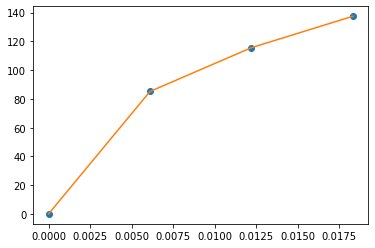

[-8.79303145e-03  2.10919112e-01 -9.58856612e+00 -1.33226763e-15]


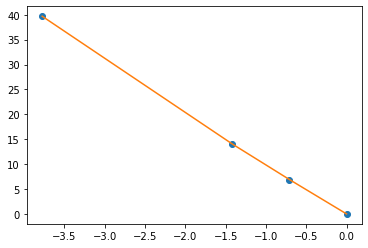

[ 1.70665620e+07 -6.84380859e+05  1.06093444e+04  2.84217094e-14]


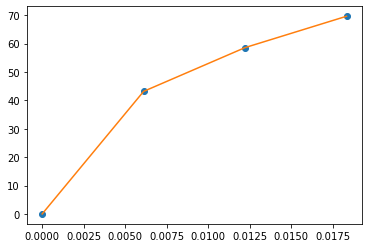

[-9.77415417e-02  9.22167271e-01 -2.04990069e+01  2.22044605e-15]


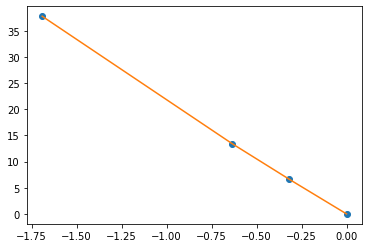

[ 1.83576222e+07 -7.36152560e+05  1.14018481e+04  3.55271368e-14]


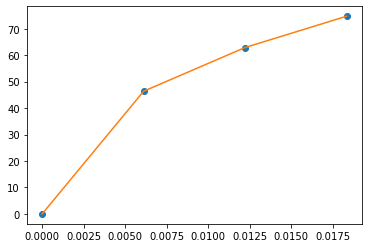

[-1.29399172e-02  2.79621733e-01 -1.17459981e+01  2.22044605e-15]


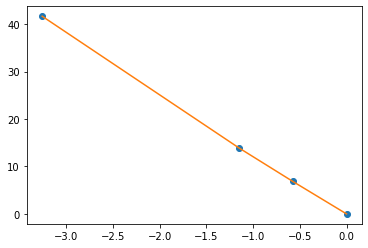

[ 1.93883906e+07 -7.77487774e+05  1.20518567e+04 -7.10542736e-15]


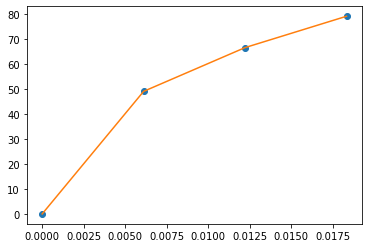

[-3.13450431e-02  1.94986758e+00 -3.02557067e+01 -8.88178420e-16]


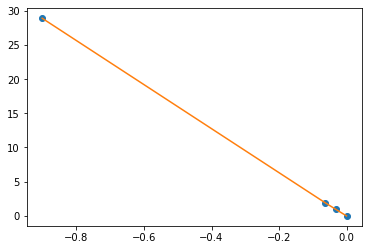

[ 2.02194718e+07 -8.10813082e+05  1.25507071e+04  2.84217094e-14]


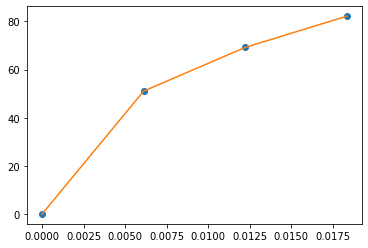

[-1.48244256e-01  1.50543475e+00 -2.57164659e+01  1.77635684e-15]


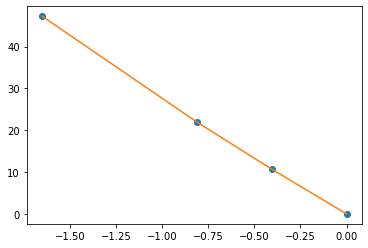

[ 1.82335237e+07 -7.31175578e+05  1.13194481e+04  3.55271368e-14]


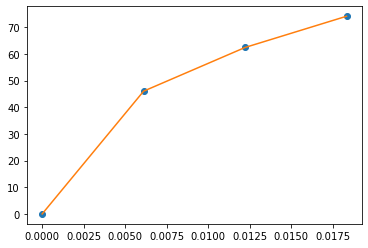

[-3.82910814e-02  6.28778870e-01 -1.57361565e+01 -1.77635684e-15]


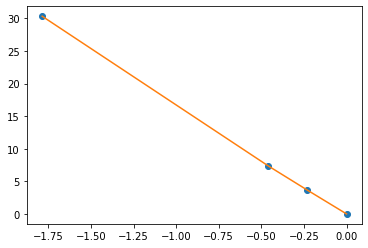

[ 3.53171182e+07 -1.41624054e+06  2.19587772e+04  5.68434189e-14]


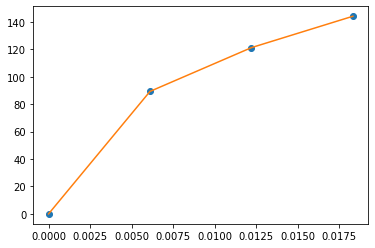

[3.85961969e+04 5.35029387e+02 3.04784559e+01 1.21430643e-17]


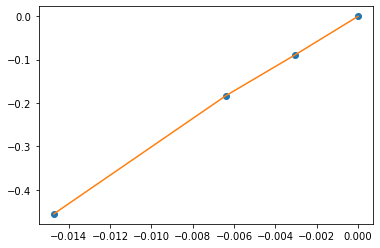

[ 2.25674039e+07 -8.88711480e+05  1.36552354e+04  2.13162821e-14]


KeyboardInterrupt: 

In [199]:
def test_func(x, a,b,c,d):
    y = a+b*x-c*np.exp(-d*x)
    return y
def test_func(x, a,b,c,d):
    y = a+b*x-c*np.exp(d*x)
    return y
def test_func(x, a,b,c,d):
    y = a+c*np.exp(d*x)
    return y

def fitting_func_wapper(x, p3):
    y = np.polyval(p3,x)
    return y

def fitting_func_wapper(x, parameters):
    a,b,c=parameters
    y = a+b*x+c*x*x
    return y

pressure_measure=list(pressure_df[colum_names["pressure"]["measure"]])
pressure_time=list(pressure_df[colum_names["pressure"]["time"]])
learn_pattern=LearnPattern(pressure_measure,pressure_time,ground_truth_buildUp,delta_pointNumber =4,fitting_func=fitting_func)
learn_pattern.learn()
learn_pattern.parameters_PatternField